# Analyse graphique de la dynamique epidemique du COVID-19 en France

> Visualisation des variations de vitesse de propagation de l'épidémie dans le temps.

- toc: true
- branch: master
- hide: false
- search_exclude: false
- badges: true
- comments: false
- author: Alexandre Payot
- categories: [Visualisation, Data, Covid]

Ce post présente la dynamique de l'épidémie et propose des graphiques montrant différentes normalisations des données permettant de mesurer les variations de la vitesse de propagation du virus.

J'ai commencé ce projet en avril 2020, lorsque la dynamique de l'épidémie était très incertaine, durant le confinement en France. Mon objectif est de mettre à jour les données toutes les semaines pour permettre un suivi des chiffres loin du sensationnalisme et des sous-estimations que l'on peut retrouver dans les médias.

Dans ce contexte, l'accent est mis sur les données pondérées sur 7 jours, ce qui permet de lisser les fluctuations importantes que l'on observe entre les différents jours de la semaine. Vous retrouverez le code utilisé à l'adresse suivante : 
[payoto/covid19-viz](https://github.com/payoto/covid19-viz)


In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#collapse-hide
import pandas as pd
from matplotlib import pyplot as plt
import requests
import datetime
from IPython.display import display, Markdown

In [3]:
display(Markdown("Article mis à jour le {}".format(datetime.date.today().strftime("%d/%m/%Y"))))

Article mis à jour le 11/10/2020

## Mise à jour des commentaires

### Le 11/10/2020

Nous observons sur les trois dernières semaines une stabilisation du nombre de réanimation : nous observons une augmentation linéaire de 25 personnes en réanimation par jour. C'est un signe encourageant qui suggère que l'épidémie a ralenti il y a quelques semaines. Malheureusement ceci ne nous donne pas d'information sur la trajectoire des deux dernières semaines.

### Le 27/09/2020

Aujourd'hui une vue agrandie sur les dernières semaines est ajoutée.

* Nous observons un phénomène surprenant d'une baisse de nombre de personne à l'hôpital, cela semble être un phénomène externe qui ne correspond pas à la dynamique de la maladie ;
* un relativement grand nombre de décès le 18/09 (80) sort de la tendance en cours.

### Le 20/09/2020

Deux points importants apparaissent dans les données :

* L'augmentation du nombre de personne en réanimation et hôpital semble se stabiliser autour de +5% par jour (doublement toutes les deux semaines) ;
* Sans surprise, les tendances en réanimations et hospitalisations commencent à apparaître dans les courbes de décès.


In [4]:
from viz import *

## Données de DataAgainst Covid-19

Les données utilisées sont celles de DataAgainst COVID-19 (aka opencovid19-fr) [github.com/opencovid19-fr/data]. Elles sont mises à jour quotidiennement.


In [5]:
#collapse-hide
file_name = 'opencovid19-fr-chiffres-cles.csv'
url = 'https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'
myfile = requests.get(url)
open(file_name, 'wb').write(myfile.content)
data = pd.read_csv('opencovid19-fr-chiffres-cles.csv')

In [6]:
#hide
data.columns

Index(['date', 'granularite', 'maille_code', 'maille_nom', 'cas_confirmes',
       'cas_ehpad', 'cas_confirmes_ehpad', 'cas_possibles_ehpad', 'deces',
       'deces_ehpad', 'reanimation', 'hospitalises',
       'nouvelles_hospitalisations', 'nouvelles_reanimations', 'gueris',
       'depistes', 'source_nom', 'source_url', 'source_archive',
       'source_type'],
      dtype='object')

In [7]:
data.tail()

date granularite maille_code                  maille_nom  \
28481  2020-10-10      region      REG-75          Nouvelle-Aquitaine   
28482  2020-10-10      region      REG-76                   Occitanie   
28483  2020-10-10      region      REG-84        Auvergne-Rhône-Alpes   
28484  2020-10-10      region      REG-93  Provence-Alpes-Côte d'Azur   
28485  2020-10-10      region      REG-94                       Corse   

       cas_confirmes  cas_ehpad  cas_confirmes_ehpad  cas_possibles_ehpad  \
28481            NaN        NaN                  NaN                  NaN   
28482            NaN        NaN                  NaN                  NaN   
28483            NaN        NaN                  NaN                  NaN   
28484            NaN        NaN                  NaN                  NaN   
28485            NaN        NaN                  NaN                  NaN   

        deces  deces_ehpad  reanimation  hospitalises  \
28481   533.0          NaN         60.0         395.0   
28482   631.0          NaN        150.0         572.0   
28483  2019.0          NaN        187.0        1083.0   
28484  1212.0          NaN        186.0         838.0   
28485    66.0          NaN          7.0          29.0   

       nouvelles_hospitalisations  nouvelles_reanimations   gueris  depistes  \
28481                        30.0                     2.0   2958.0       NaN   
28482                        69.0                    14.0   4046.0       NaN   
28483                       130.0                    16.0  10128.0       NaN   
28484                        71.0                     9.0   8738.0       NaN   
28485                         2.0                     0.0    308.0       NaN   

           source_nom source_url source_archive     source_type  
28481  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
28482  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
28483  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
28484  OpenCOVID19-fr        NaN            NaN  opencovid19-fr  
28485  OpenCOVID19-fr        NaN            NaN  opencovid19-fr

In [8]:
#hide
for a in data[["maille_code", "maille_nom"]].groupby(["maille_code", "maille_nom"]):
    print(f"{a[0]}")

('COM-974', 'La Réunion')
('COM-977', 'Saint-Barthélemy')
('COM-978', 'Saint-Martin')
('COM-986', 'Wallis et Futuna')
('COM-987', 'Polynésie française')
('COM-988', 'Nouvelle-Calédonie')
('DEP-01', 'Ain')
('DEP-02', 'Aisne')
('DEP-03', 'Allier')
('DEP-04', 'Alpes-de-Haute-Provence')
('DEP-05', 'Hautes-Alpes')
('DEP-06', 'Alpes-Maritimes')
('DEP-07', 'Ardèche')
('DEP-08', 'Ardennes')
('DEP-09', 'Ariège')
('DEP-10', 'Aube')
('DEP-11', 'Aude')
('DEP-12', 'Aveyron')
('DEP-13', 'Bouches-du-Rhône')
('DEP-14', 'Calvados')
('DEP-15', 'Cantal')
('DEP-16', 'Charente')
('DEP-17', 'Charente-Maritime')
('DEP-18', 'Cher')
('DEP-19', 'Corrèze')
('DEP-21', "Côte-d'Or")
('DEP-22', "Côtes-d'Armor")
('DEP-23', 'Creuse')
('DEP-24', 'Dordogne')
('DEP-25', 'Doubs')
('DEP-26', 'Drôme')
('DEP-27', 'Eure')
('DEP-28', 'Eure-et-Loir')
('DEP-29', 'Finistère')
('DEP-2A', 'Corse-du-Sud')
('DEP-2B', 'Haute-Corse')
('DEP-30', 'Gard')
('DEP-31', 'Haute-Garonne')
('DEP-32', 'Gers')
('DEP-33', 'Gironde')
('DEP-34', 'Hér

In [9]:
data = enable_time_series_plot(data, timein_field="date", timeseries_field_out="t")

## Dernières données pour la France

Ici, nous tabulons les derniers jours de données pour la France. Les données brutes ainsi que les données avec une moyenne glissante sur 7 jours sont calculées. Nous n'observons que les réanimations, les hospitalisations et les décès. Les données de cas confirmés ont longtemps été insuffisantes pour permettre une analyse intelligente de l'épidémie.

Dans les graphiques ci-après nous analysons trois types de données :

* les données brutes d'entrées en réanimation et de décès ;
* ces même données pondérées sur 7 jours ;
* ces données pondérées normalisée par le nombre de personnes en réanimation.

Ce troisième graphique donne donc une indication de l'accélération ou ralentissement, même lorsque les données sont d'ampleurs très différentes.


deces  deces_ehpad  reanimation  hospitalises  \
t                                                             
2020-09-30  21264.0      10692.0       1238.0        6590.0   
2020-10-01  21327.0      10692.0       1265.0        6652.0   
2020-10-02  21374.0      10781.0       1276.0        6758.0   
2020-10-03  21417.0      10781.0       1295.0        6758.0   
2020-10-04  21449.0      10781.0       1341.0        6982.0   
2020-10-05  21518.0      10781.0       1415.0        7294.0   
2020-10-06  21580.0      10785.0       1426.0        7398.0   
2020-10-07  21660.0      10785.0       1416.0        7536.0   
2020-10-08  21736.0      10785.0       1427.0        7624.0   
2020-10-09  21798.0      10785.0       1448.0        7864.0   

            reanimation_cumul  hospitalises_cumul  deces_jour  \
t                                                               
2020-09-30           370036.0           2526237.0        63.0   
2020-10-01           371301.0           2532889.0        63.0   
2020-10-02           372577.0           2539647.0        47.0   
2020-10-03           373872.0           2546405.0        43.0   
2020-10-04           375213.0           2553387.0        32.0   
2020-10-05           376628.0           2560681.0        69.0   
2020-10-06           378054.0           2568079.0        62.0   
2020-10-07           379470.0           2575615.0        80.0   
2020-10-08           380897.0           2583239.0        76.0   
2020-10-09           382345.0           2591103.0        62.0   

            deces_jour_jour  deces_ehpad_jour  deces_ehpad_jour_jour  ...  \
t                                                                     ...   
2020-09-30              4.0               0.0                  -26.0  ...   
2020-10-01              0.0               0.0                    0.0  ...   
2020-10-02            -16.0              89.0                   89.0  ...   
2020-10-03             -4.0               0.0                  -89.0  ...   
2020-10-04            -11.0               0.0                    0.0  ...   
2020-10-05             37.0               0.0                    0.0  ...   
2020-10-06             -7.0               4.0                    4.0  ...   
2020-10-07             18.0               0.0                   -4.0  ...   
2020-10-08             -4.0               0.0                    0.0  ...   
2020-10-09            -14.0               0.0                    0.0  ...   

            deces_jour_mma_jour  deces_ehpad_jour_mma_jour  deces_jour_prop  \
t                                                                             
2020-09-30             2.857143                   0.000000         0.002526   
2020-10-01             1.571429                   0.000000         0.002592   
2020-10-02            -1.142857                  -0.857143         0.002533   
2020-10-03             0.571429                   0.000000         0.002555   
2020-10-04             0.714286                   0.000000         0.002584   
2020-10-05            -1.714286                   0.000000         0.002496   
2020-10-06             0.428571                  -3.142857         0.002509   
2020-10-07             2.428571                   0.000000         0.002612   
2020-10-08             1.857143                   0.000000         0.002688   
2020-10-09             2.142857                 -12.714286         0.002779   

            deces_ehpad_jour_prop  reanimation_jour_prop  \
t                                                          
2020-09-30               0.001617               0.027233   
2020-10-01               0.001617               0.024506   
2020-10-02               0.001524               0.019928   
2020-10-03               0.001524               0.020298   
2020-10-04               0.001524               0.023756   
2020-10-05               0.001524               0.025341   
2020-10-06               0.001232               0.022240   
2020-10-07               0.001232               0.017958   
20

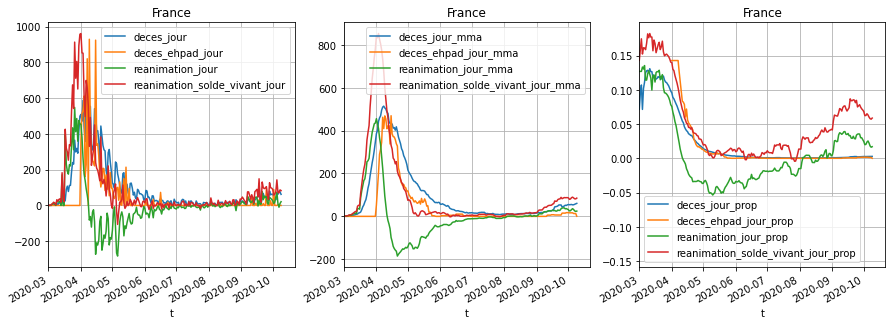

In [10]:
#collapse-hide

maille_active = 'FRA'
fra = oc19_data_preproc(data, maille_active)
fra.tail(10)

## Dynamique de l'épidémie

Dans les graphiques qui suivent nous regardons sur l'axe des abscisses le nombre de personnes dans un état donné de maladie COVID. Vous retrouvez ces valeurs sur le graphique de gauche.

Au milieu, l'axe des ordonnées représente le changement de jour en jour de l'axe des abscisses, les points indique les données brutes, et la ligne les données moyennées.

A droite, ces mêmes données de l'axe des ordonnées sont normalisées pour indiquer un changement en pourcents par jour.

Chaque couleur correspond à une semaine.


In [11]:
#collapse-hide
def plots_maille_code(maille_active='FRA', **kwargs):
    fra = oc19_data_preproc(data, maille_active)
    plt.close()
    # plot_field_loops(fra, "deces_ehpad", center=False, maille_active=maille_active)
    plot_field_loops(fra, "hospitalises_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    plot_field_loops(fra, "reanimation_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    plot_field_loops(fra, "deces", center=False, maille_active=maille_active, **kwargs)


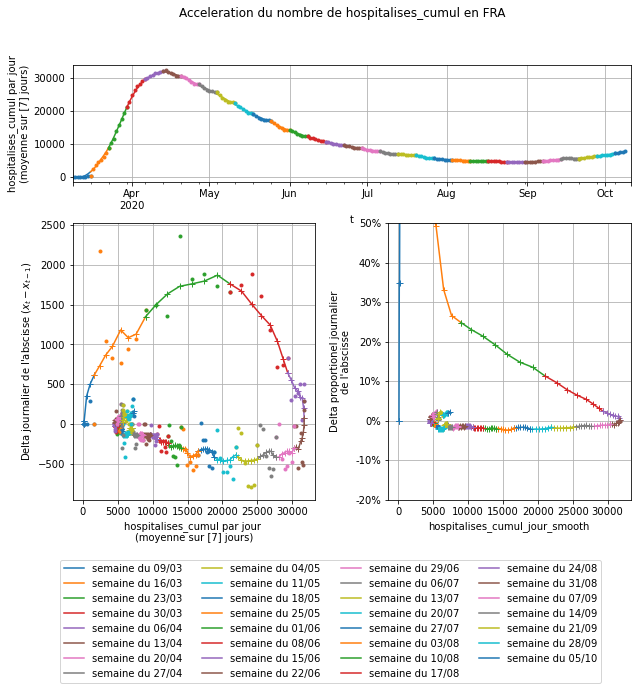

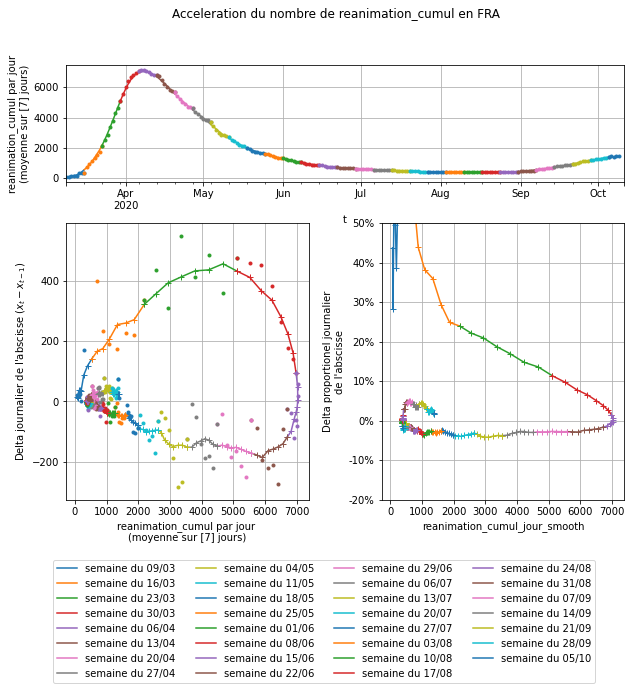

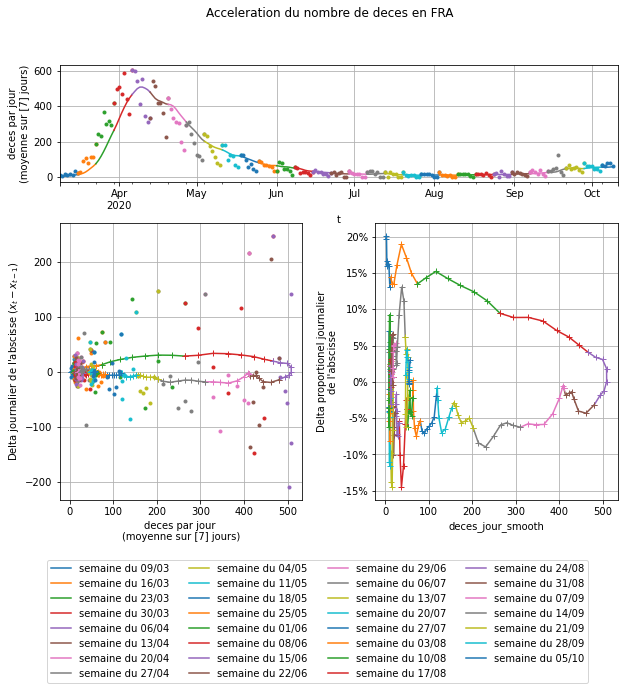

In [12]:
plots_maille_code(maille_active='FRA')

Il est intéressant de zoomer sur les données depuis la fin du confinement.

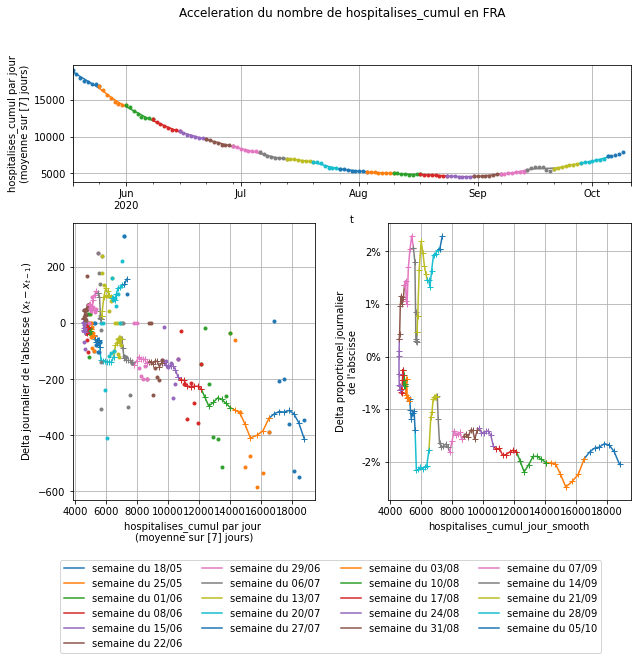

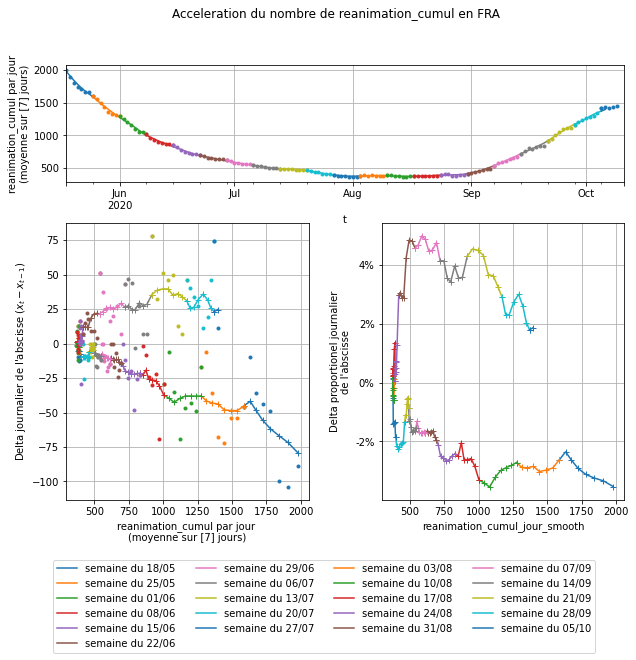

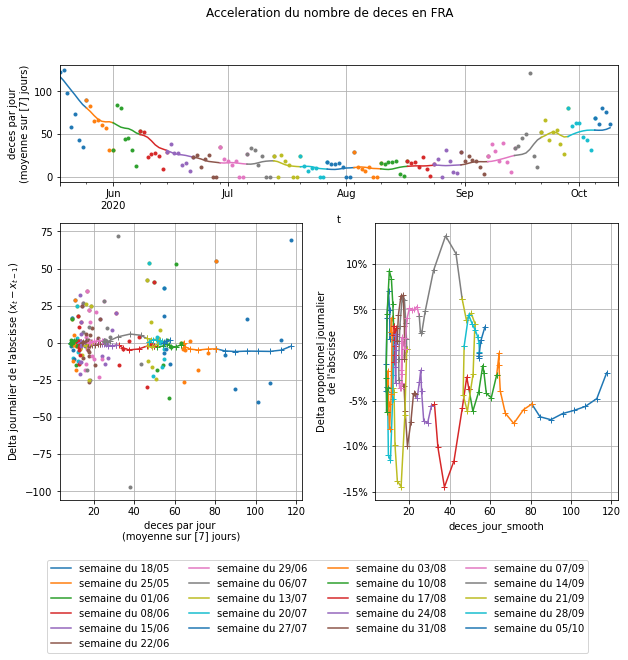

In [14]:
plots_maille_code(maille_active='FRA', start_date='2020-05-18')

Ces courbes évoluent en boucles (ou en spirale en cas de plusieurs vagues successives) :

* Au début de l'épidémie les courbes commencent à l’origine ;
* puis se suit une accélération rapide dans la partie supérieure du graphique ;
* avec le confinement l'augmentation de jour en jour ralenti, cela se voit à la pente négative dès la semaine du 23 Mars ;
* l'épidémie atteint son pic la semaine du 06 Avril ;
* Nous voyons ensuite une réduction stable autour de 5% par jour jusqu'à la semaine du 08 Juin ;
* La période estivale indique bien que l'épidémie n'allait pas disparaître car ne retournant pas à l’origine ;
* depuis le 15 Août le nombre de d'hospitalisations et de réanimation s'accroit et c'est la deuxième semaine de Septembre qui semble indiqué qu'une deuxième vague a commencé.

Une deuxième vague se manifestera comme une spirale dans les graphiques au-dessus.


### Dynamique en Ile de France

Ici les mêmes graphiques sont présentés pour l'île de France. 

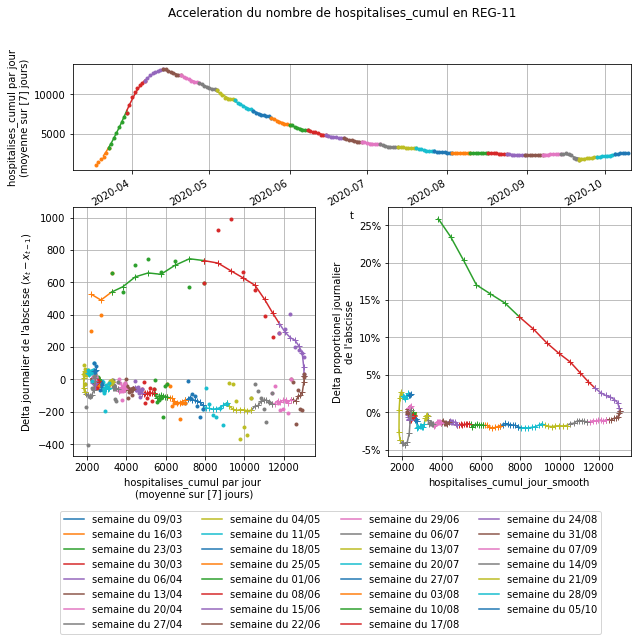

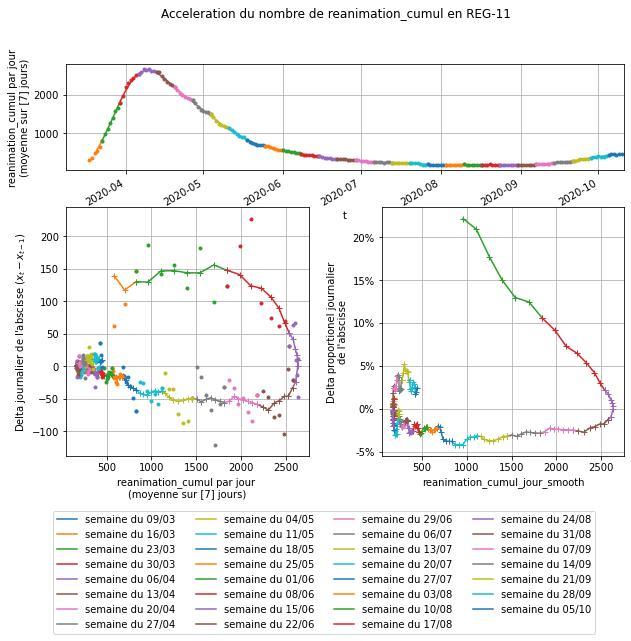

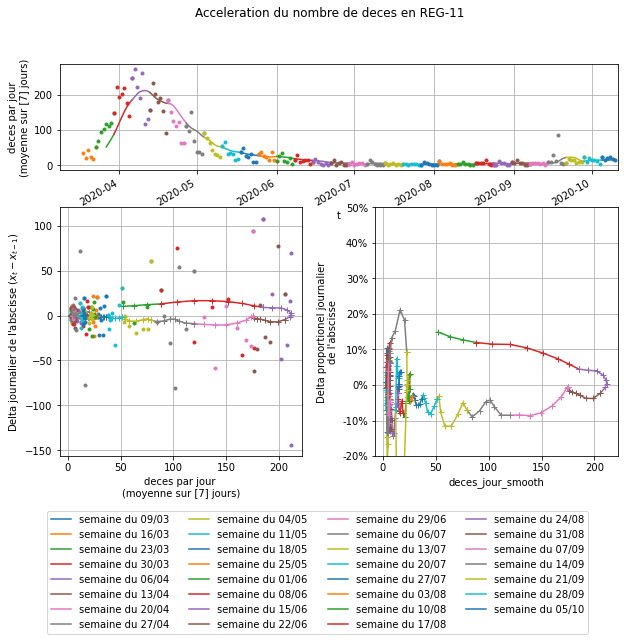

In [15]:
plots_maille_code(maille_active='REG-11')

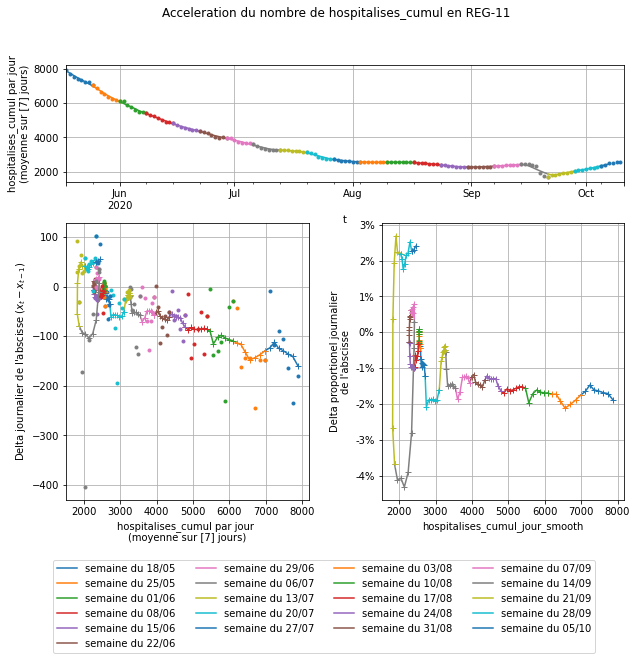

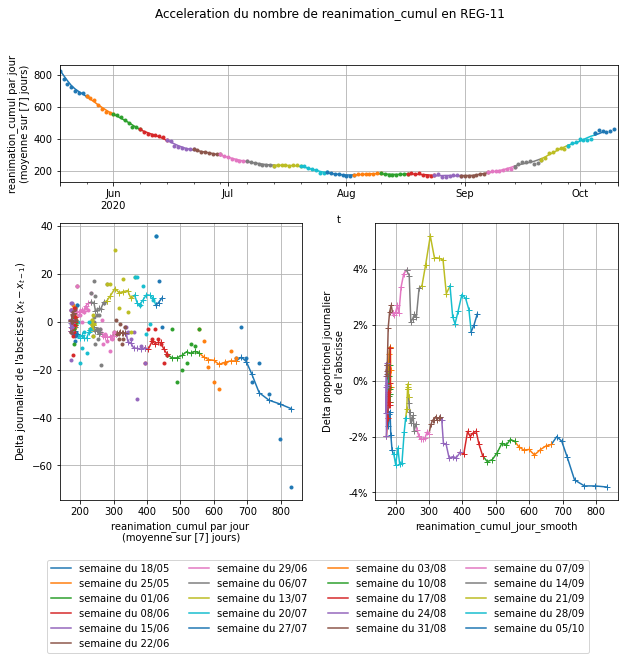

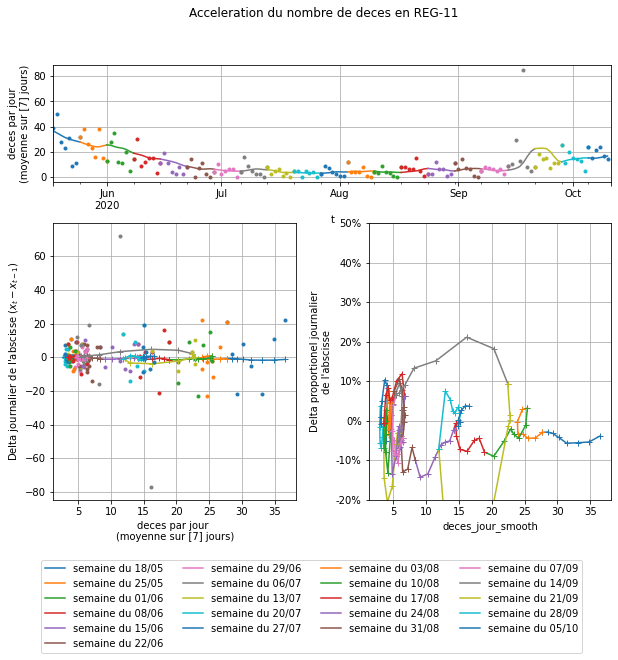

In [16]:
plots_maille_code(maille_active='REG-11', start_date='2020-05-18')

## Graphes par régions

Pour chaque région les nombres de réanimation et de décès ainsi que leur dynamique sont présentées ci-dessous.

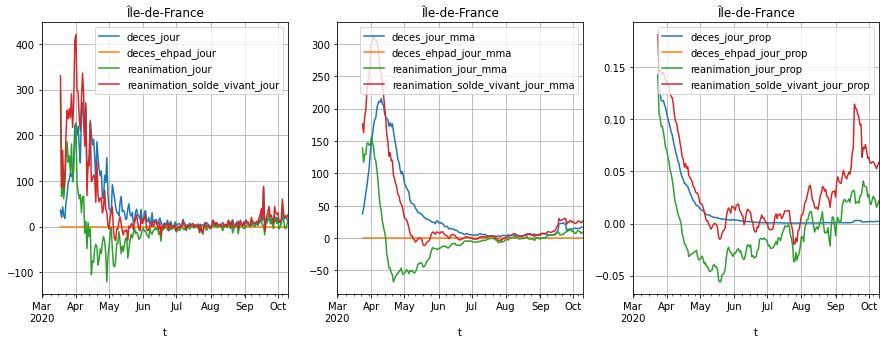

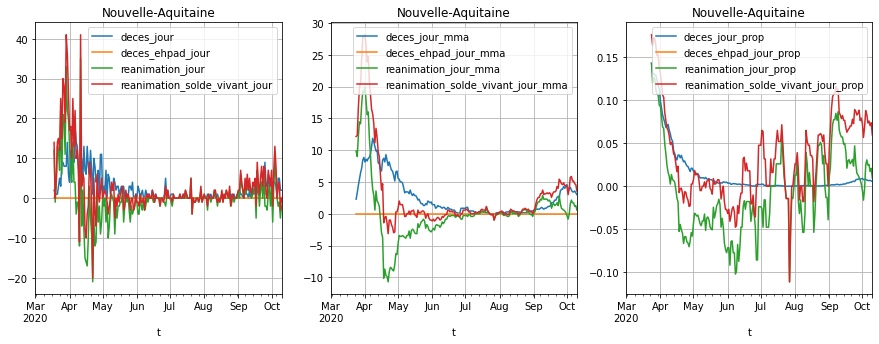

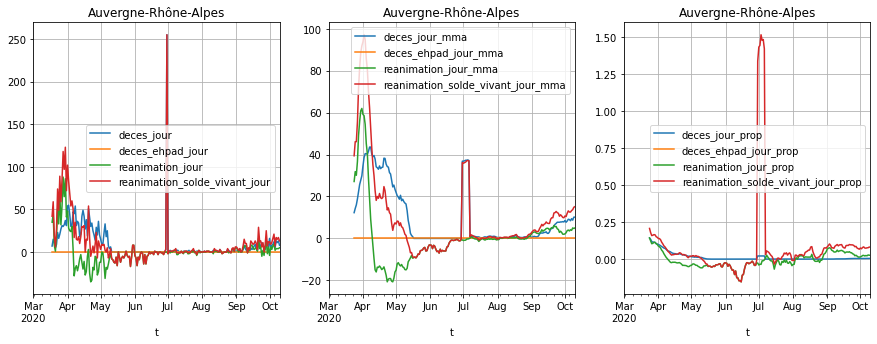

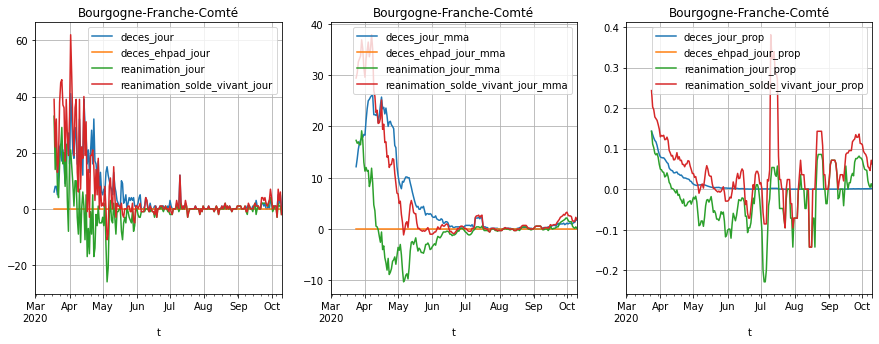

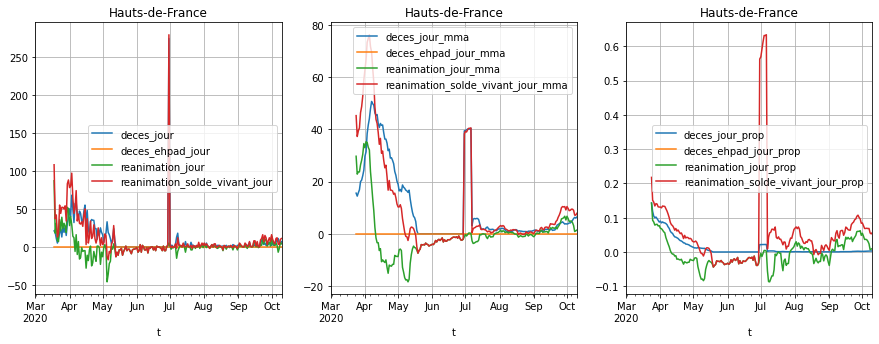

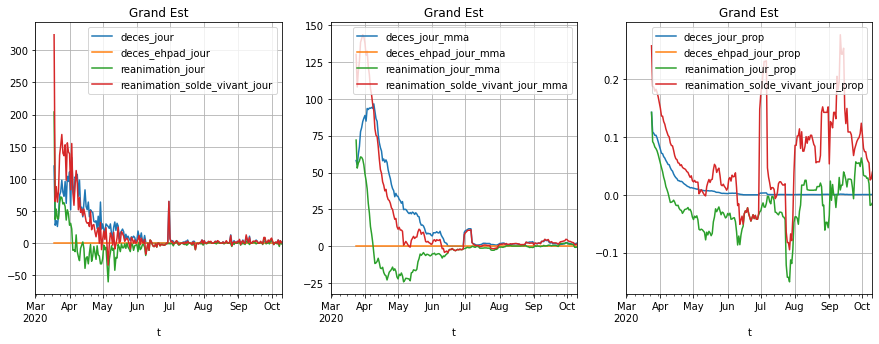

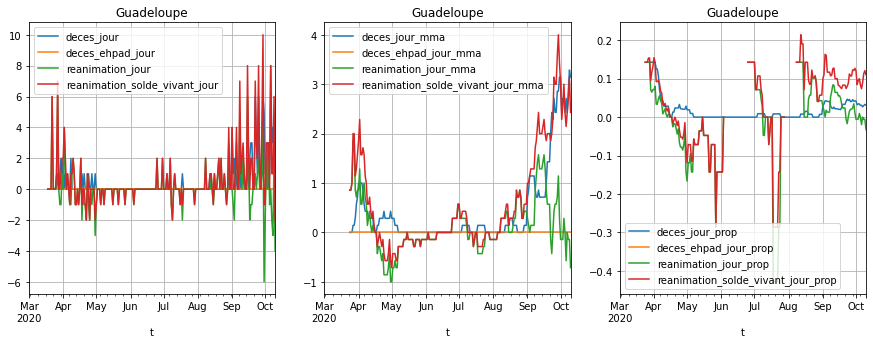

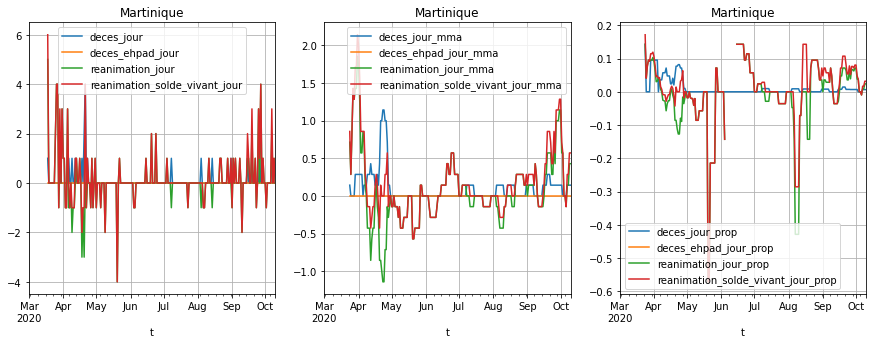

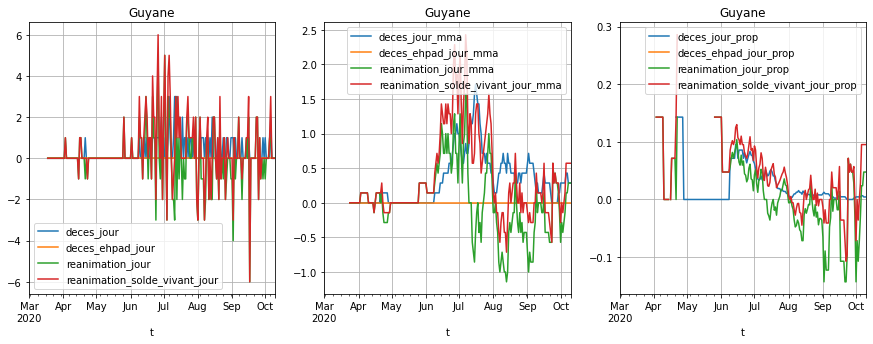

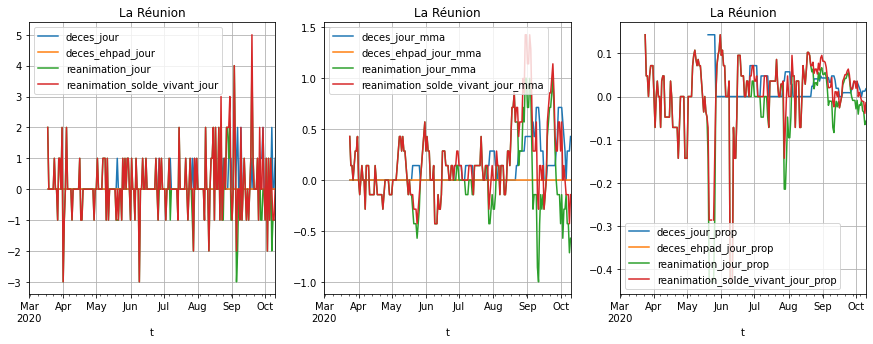

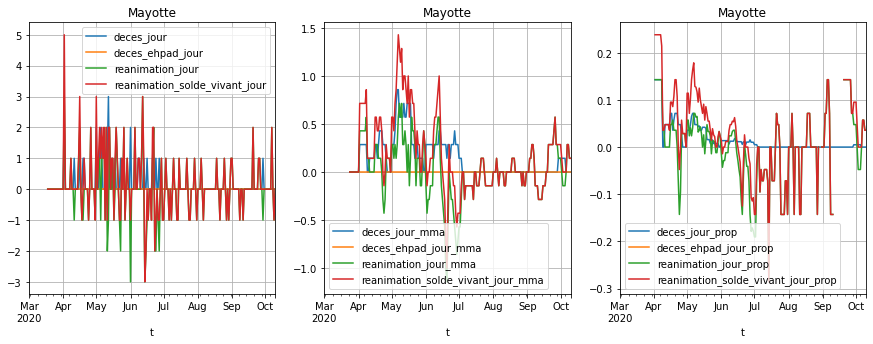

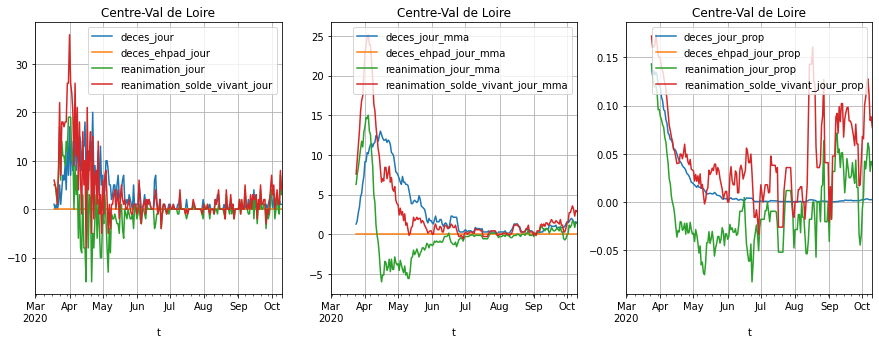

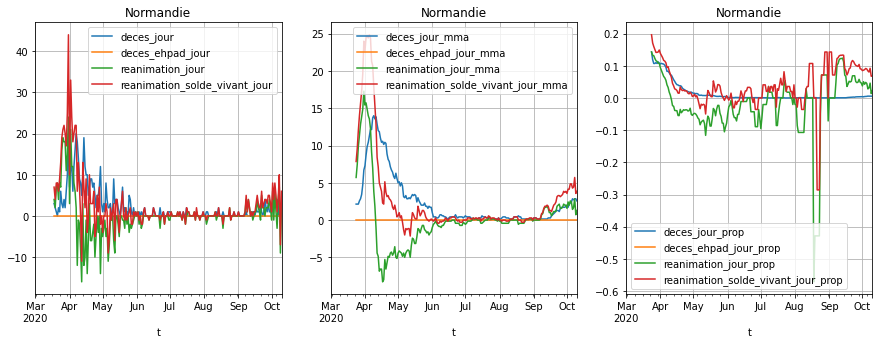

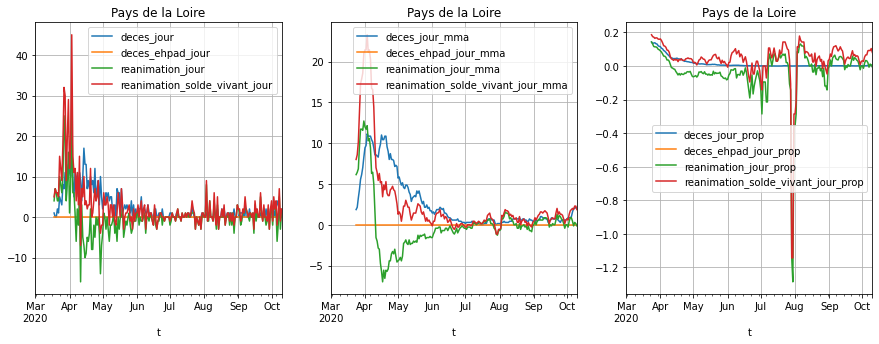

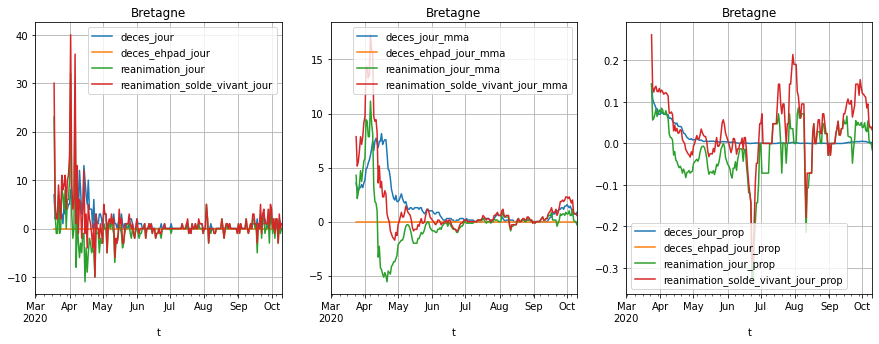

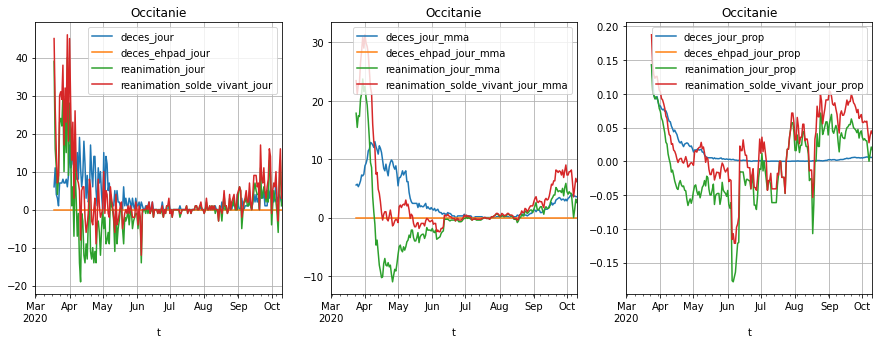

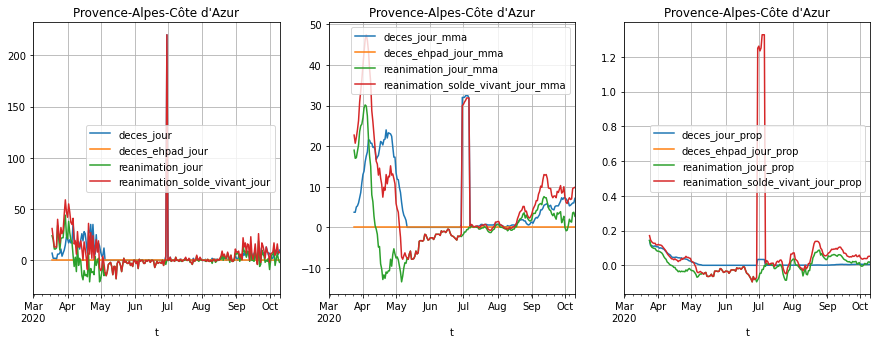

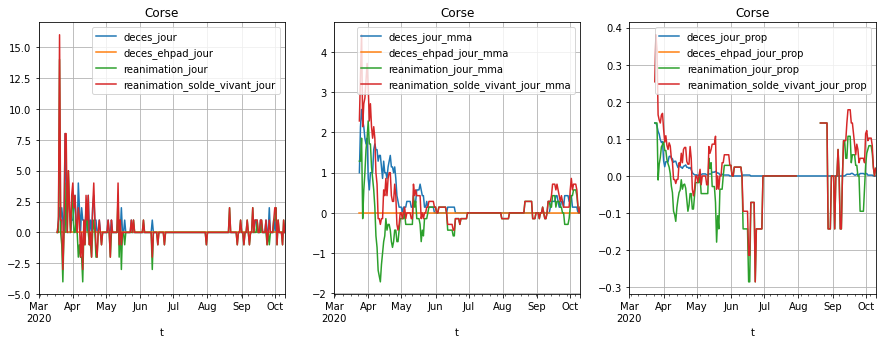

In [17]:
list_reg = [r for r in data["maille_code"].unique() if "REG" in r]
for reg in list_reg:
    oc19_data_preproc(data, reg)